In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
img_height, img_width = 28, 28
batch_size = 128

In [46]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'Dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'Dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Classes: {train_generator.class_indices}")

Found 7886 images belonging to 63 classes.
Found 1947 images belonging to 63 classes.
Classes: {'a': 0, 'b': 1, 'ba': 2, 'be_bi': 3, 'bo_bu': 4, 'd': 5, 'da_ra': 6, 'de_di': 7, 'do_du': 8, 'e_i': 9, 'g': 10, 'ga': 11, 'ge_gi': 12, 'go_gu': 13, 'h': 14, 'ha': 15, 'he_hi': 16, 'ho_hu': 17, 'k': 18, 'ka': 19, 'ke_ki': 20, 'ko_ku': 21, 'l': 22, 'la': 23, 'le_li': 24, 'lo_lu': 25, 'm': 26, 'ma': 27, 'me_mi': 28, 'mo_mu': 29, 'n': 30, 'na': 31, 'ne_ni': 32, 'ng': 33, 'nga': 34, 'nge_ngi': 35, 'ngo_ngu': 36, 'no_nu': 37, 'o_u': 38, 'p': 39, 'pa': 40, 'pe_pi': 41, 'po_pu': 42, 'r': 43, 'ra': 44, 're_ri': 45, 'ro_ru': 46, 's': 47, 'sa': 48, 'se_si': 49, 'so_su': 50, 't': 51, 'ta': 52, 'te_ti': 53, 'to_tu': 54, 'w': 55, 'wa': 56, 'we_wi': 57, 'wo_wu': 58, 'y': 59, 'ya': 60, 'ye_yi': 61, 'yo_yu': 62}


In [47]:
X_train, y_train = next(train_generator)
X_val, y_val = next(val_generator)

print("Original shape:", X_train.shape)

Original shape: (128, 28, 28, 1)


In [48]:
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)

In [49]:
model = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Elijah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128)            │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 63)             │         8,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,023 (410.25 KB)

 Trainable params: 105,023 (410.25 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:


history = model.fit(
    train_generator,
    validation_data=(val_generator),
    epochs=10,
    batch_size=128,
)

c:\Users\Elijah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.0179 - loss: 4.1602 - val_accuracy: 0.0467 - val_loss: 4.0612
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.0424 - loss: 3.9600 - val_accuracy: 0.1489 - val_loss: 3.2132
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.1349 - loss: 3.1231 - val_accuracy: 0.3677 - val_loss: 2.1610
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.2642 - loss: 2.3477 - val_accuracy: 0.4525 - val_loss: 1.7787
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.3483 - loss: 1.9292 - val_accuracy: 0.5167 - val_loss: 1.4164
Epoch 6/10
57/62 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4358 - loss: 1.6356

KeyboardInterrupt: 

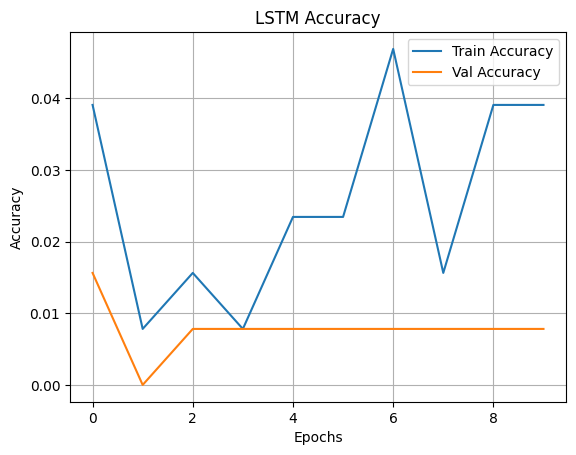

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('lstm_letter_recognizer.h5')
print("Model saved as lstm_letter_recognizer.h5")

Model saved as lstm_letter_recognizer.h5


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model('lstm_letter_recognizer.h5')

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img).reshape(1, 28, 28) / 255.0

prediction = model.predict(img_array)
class_idx = np.argmax(prediction)

labels = list(train_generator.class_indices.keys())
predicted_letter = labels[class_idx]
print(f"Predicted Letter: {predicted_letter}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Predicted Letter: ng
